In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
def load_img():
    blank_img = np.zeros(shape=(600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50,300), fontFace=font, fontScale=5, color=(255,255,255), thickness=25)
    return blank_img

In [18]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(img, cmap='gray')

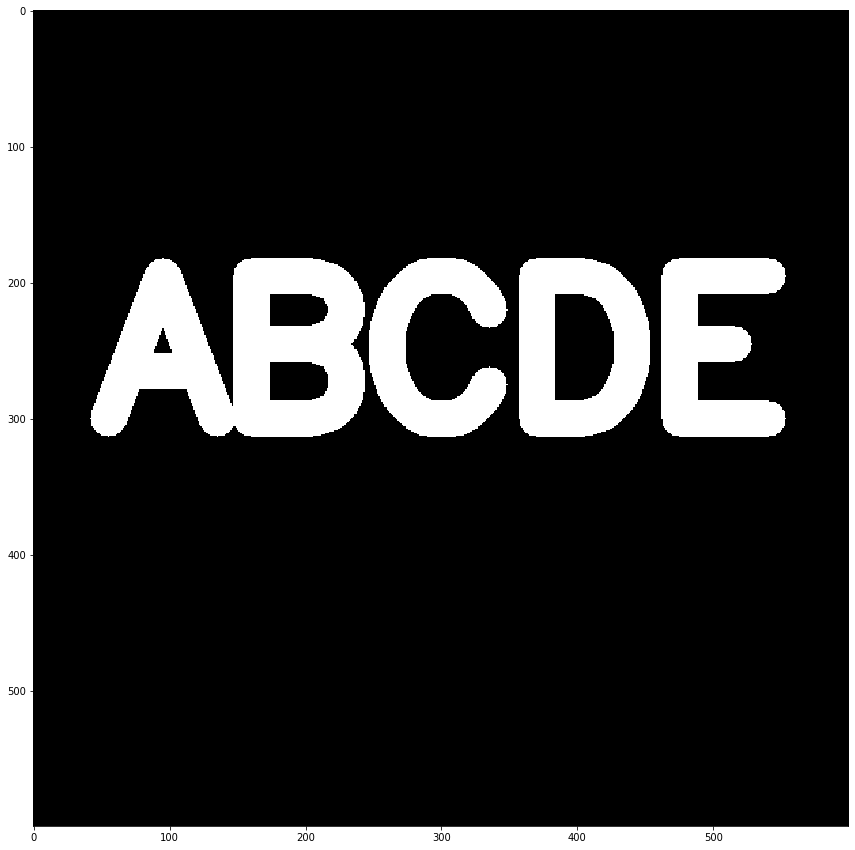

In [19]:
img = load_img()
show_pic(img)

In [13]:
kernel = np.ones((5,5))
kernel

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

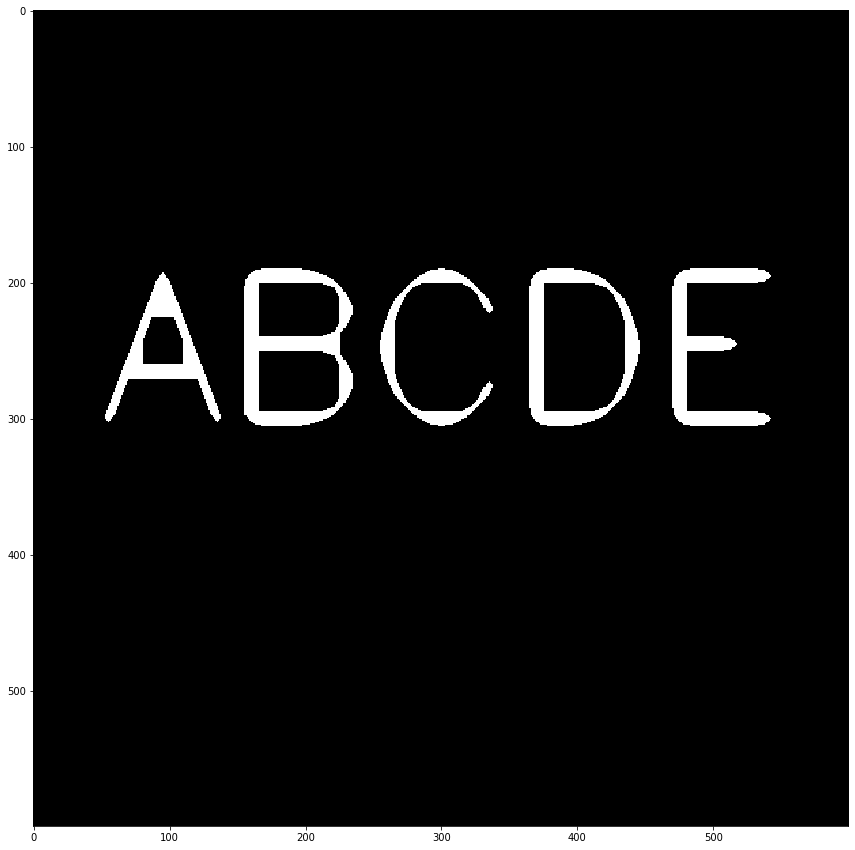

In [24]:
eroded = cv2.erode(img, kernel, iterations=4)
show_pic(eroded)

In [25]:
img = load_img()

In [26]:
noise = np.random.randint(low=0, high=2, size=(600,600))

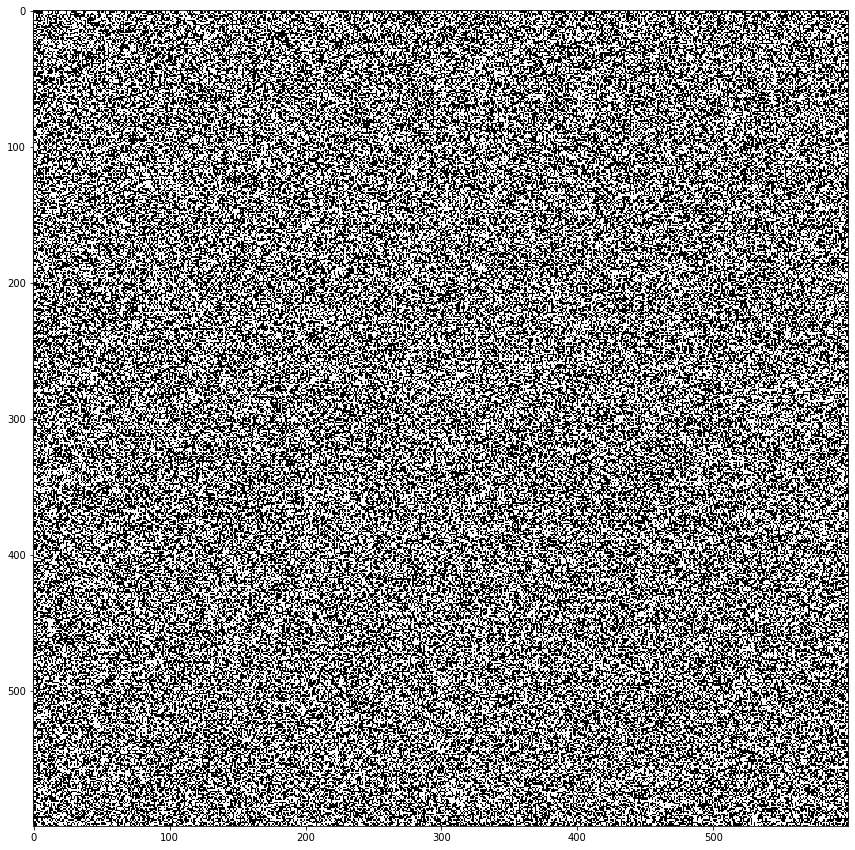

In [27]:
show_pic(noise)

In [28]:
img.max()

255.0

In [29]:
noise = noise*255
noise

array([[255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0, 255,   0],
       [  0, 255,   0, ...,   0, 255, 255],
       ...,
       [  0,   0, 255, ..., 255,   0,   0],
       [255,   0,   0, ..., 255,   0, 255],
       [255,   0,   0, ...,   0,   0, 255]])

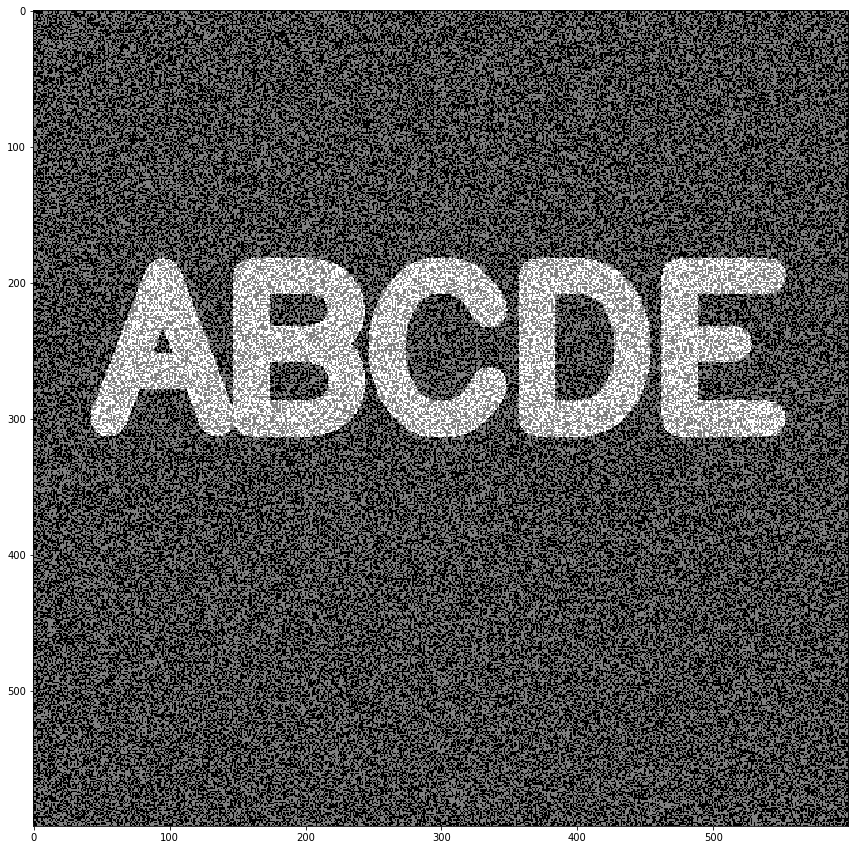

In [31]:
noise_img = img + noise
show_pic(noise_img)

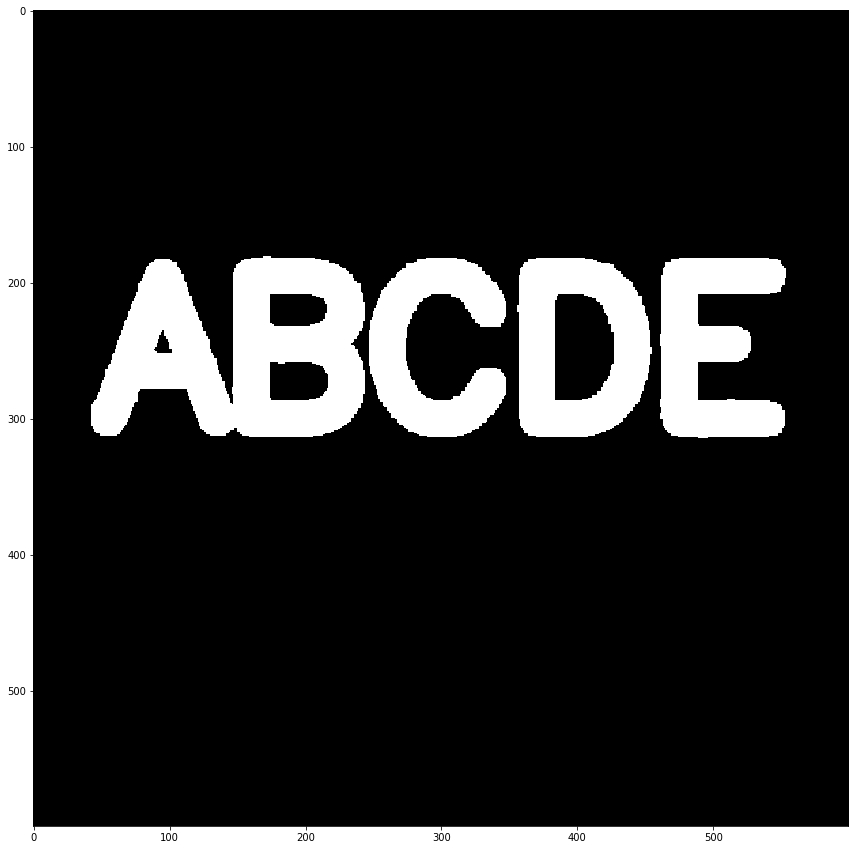

In [32]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
show_pic(opening)

**It is not the perfect rendition of the original image. It has some distortions which can be clearly seen in the boundary of the letters. But it does quite a commendable job considering how much noise was there in the original image.**

In [33]:
img = load_img()

In [34]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))

In [35]:
black_noise = black_noise * -255

In [36]:
black_noise

array([[-255, -255,    0, ...,    0,    0,    0],
       [-255, -255, -255, ..., -255, -255, -255],
       [-255, -255, -255, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., -255, -255, -255],
       [   0,    0, -255, ..., -255,    0,    0],
       [-255, -255,    0, ..., -255, -255, -255]])

In [38]:
black_noise_img = img + black_noise

In [39]:
black_noise_img[black_noise_img == -255] = 0

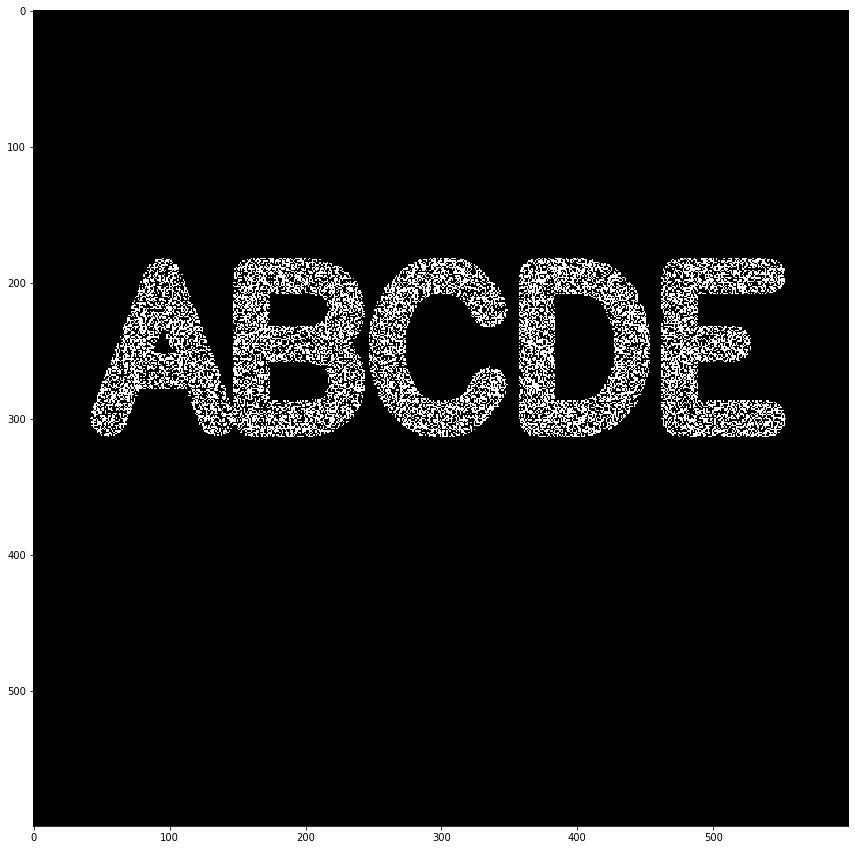

In [41]:
show_pic(black_noise_img)

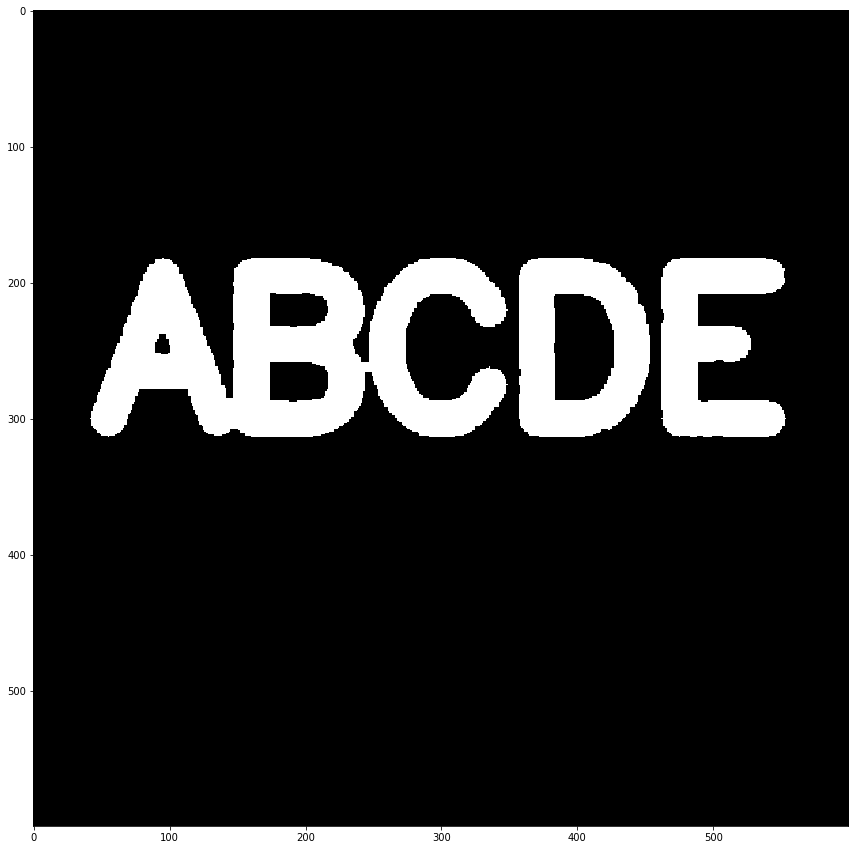

In [45]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
show_pic(closing)

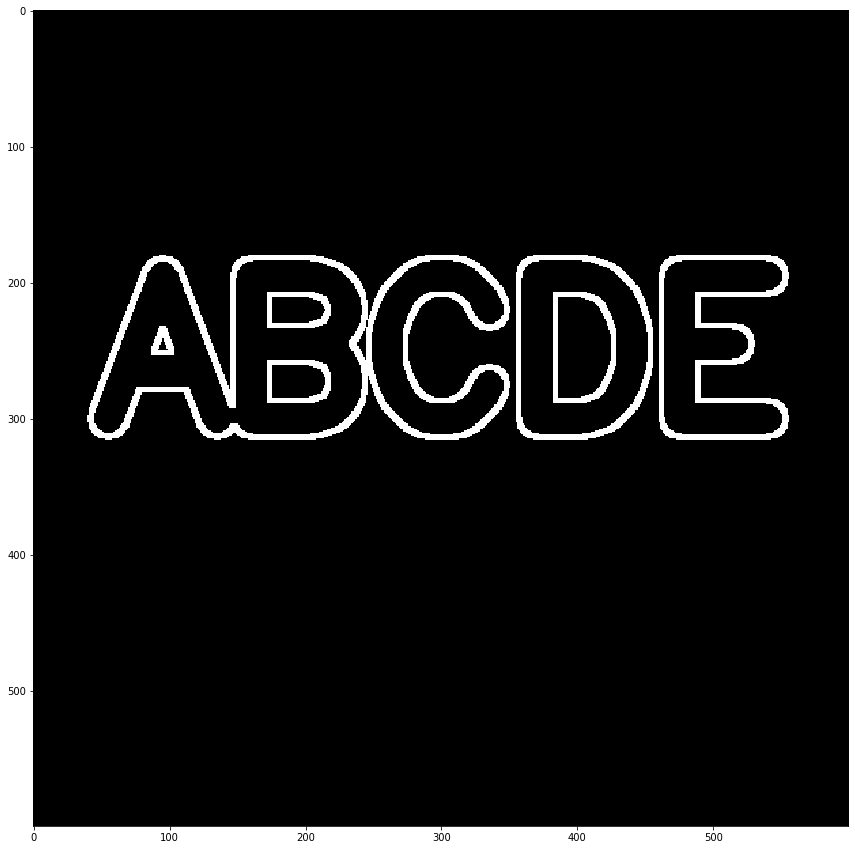

In [43]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
show_pic(gradient)

**Some important links :**

**https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38**